<figure>
  <IMG SRC="https://www.colorado.edu/cs/profiles/express/themes/cuspirit/logo.png" WIDTH=50 ALIGN="right">
</figure>

*CSPB 4830 - Yoshie Bell-Souder*

   ## <font color='#7d1010'>Identify mushroom types</font>

## <font color='#7d1010'>1. Introduction</font>

There are so many kinds of mushrooms in the world. It was said more than 2.2 million kinds of mushrooms. Mushrooms are paid attention as nutrition and natural resource, value to recreational foragers.  There are still debates about how to eat, and how safe to eat.  I would like to use clustering algorithms on the mushroom data to identify mushroom types.  I will use the data for an unsupervised learning model, to evaluate edible mushrooms or not. 

## <font color='#7d1010'>2. Data collection</font>

The dataset came from Product of bachelor thesis at Philipps-University Marburg, Bioinformatics Division, supervised by Dr. G. Hattab. The data originally comes from: https://archive.ics.uci.edu/ml/datasets/Secondary+Mushroom+Dataset with Mushroom species drawn from source book:Patrick Hardin.Mushrooms & Toadstools.Zondervan, 1999

There are 20 features. and one target.  

<b>Original Datasize:</b> 2821 kb, 61069 samples, 20 mushroom features.


- 20 features
   1. cap-diameter (m):			float number in cm
   2. cap-shape (n):            bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o
   3. cap-surface (n):          fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e
   4. cap-color (n):            brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o,  black=k
   5. does-bruise-bleed (n):	bruises-or-bleeding=t,no=f
   6. gill-attachment (n):      adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f, unknown=?
   7. gill-spacing (n):         close=c, distant=d, none=f
   8. gill-color (n):           brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o,  black=k,  none=f
   9. stem-height (m):			float number in cm
   10. stem-width (m):			float number in mm   
   11. stem-root (n):           bulbous=b, swollen=s, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r
   12. stem-surface (n): 		fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e, none=f
   13. stem-color (n):			brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o,  black=k, none=f
   14. veil-type (n):           partial=p, universal=u
   15. veil-color (n):          brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o,  black=k, none=f
   16. has-ring (n):            ring=t, none=f
   17. ring-type (n):           cobwebby=c, evanescent=e, flaring=r, grooved=g, large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
   18. spore-print-color (n):   brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o,  black=k
   19. habitat (n):             grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d
   20. season (n):				spring=s, summer=u, autumn=a, winter=w</br>
  
  
- target: poison(p) / edible(e) 

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
import time
df = pd.read_csv('MushroomDataset\data.csv')
df_original = pd.read_csv('MushroomDataset\data.csv')
target = pd.read_csv('MushroomDataset\label_data.csv')
# labels = df['class']

In [4]:
#Preview the dataset of target
target.head()

,class
0,p
1,p
2,p
3,p
4,p


In [5]:
#Preview the dataset
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [6]:
#Check shape of the dataset
df.shape

(61069, 21)

In [7]:
#View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

## <font color='#7d1010'>3. Data processing, cleanup and EDA</font>

In [8]:
#Check for missing values in dataset
pd.DataFrame({'Missing Values': df.isna().sum()})

,Missing Values
class,0
cap-diameter,0
cap-shape,0
cap-surface,14120
cap-color,0
does-bruise-or-bleed,0
gill-attachment,9884
gill-spacing,25063
gill-color,0
stem-height,0


The data had some NaN values. After I heard professor Kim's advise, she recommended to drop the columns if NaN has more than 10 %.  I will drop 8 features, which are cap-surface, gill-attachment, gill-spacing, stem-root, stem-surface, veil-type, veil-color, spore-print-color.

In [9]:
df_with_target = df.drop(['cap-surface', 'gill-attachment', 'gill-spacing', 'stem-root', 'stem-surface', 
                                  'veil-type', 'veil-color', 'spore-print-color'], axis=1)
df = df.drop(['class', 'cap-surface', 'gill-attachment', 'gill-spacing', 'stem-root', 'stem-surface', 
                                  'veil-type', 'veil-color', 'spore-print-color'], axis=1)
print(df.shape)
df.head()

(61069, 12)


,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,15.26,x,o,f,w,16.95,17.09,w,t,g,d,w
1,16.60,x,o,f,w,17.99,18.19,w,t,g,d,u
2,14.07,x,o,f,w,17.80,17.74,w,t,g,d,w
3,14.17,f,e,f,w,15.77,15.98,w,t,p,d,w
4,14.64,x,o,f,w,16.53,17.20,w,t,p,d,w


As you may see, there are many categorical features, like mushroom cap color is brown, green. I will convert categorical variable into integers.


In [10]:
# get all categorical columns in the dataframe
catCols = [col for col in df.columns if df[col].dtype=="O"]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for item in catCols:
    df[item] = le.fit_transform(df[item])

In [11]:
# get all categorical columns in the dataframe
catCols = [col for col in df_with_target.columns if df_with_target[col].dtype=="O"]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for item in catCols:
    df_with_target[item] = le.fit_transform(df_with_target[item])

In [12]:
print(df.shape)
df.head()

(61069, 12)


,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,15.26,6,6,0,10,16.95,17.09,11,1,2,0,3
1,16.60,6,6,0,10,17.99,18.19,11,1,2,0,2
2,14.07,6,6,0,10,17.80,17.74,11,1,2,0,3
3,14.17,2,1,0,10,15.77,15.98,11,1,5,0,3
4,14.64,6,6,0,10,16.53,17.20,11,1,5,0,3


In [13]:
#Check for summary statistics
df.describe()

,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
count,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000,61069.000000
mean,6.733854,4.041641,6.144541,0.173410,7.338502,6.581538,12.149410,8.429072,0.248555,1.733236,0.623721,1.053300
std,5.264845,2.138630,3.171077,0.378605,3.186426,3.370017,10.035955,3.218516,0.432179,1.950244,1.265880,1.100575
min,0.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.480000,2.000000,5.000000,0.000000,5.000000,4.640000,5.210000,6.000000,0.000000,1.000000,0.000000,0.000000
50%,5.860000,5.000000,5.000000,0.000000,7.000000,5.950000,10.190000,11.000000,0.000000,1.000000,0.000000,1.000000
75%,8.540000,6.000000,10.000000,0.000000,10.000000,7.740000,16.570000,11.000000,0.000000,1.000000,1.000000,2.000000
max,62.340000,6.000000,11.000000,1.000000,11.000000,33.920000,103.910000,12.000000,1.000000,8.000000,7.000000,3.000000


Distribution plot to see if there are some features that have too wide or too narrow distributions. After looking at the distribution of the box plot below, we can see none of the features is needed to be eliminated based on distribution.

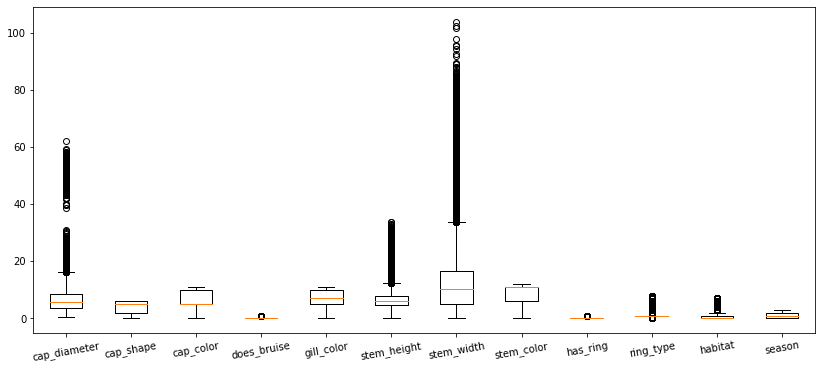

In [14]:
# box plot to see how each feature is distributed
cap_diameter = df["cap-diameter"]
cap_shape = df["cap-shape"]
cap_color = df["cap-color"]
does_bruise = df["does-bruise-or-bleed"]
gill_color = df["gill-color"]
stem_height = df["stem-height"]
stem_width = df["stem-width"]
stem_color = df["stem-color"]
has_ring = df["has-ring"]
ring_type = df["ring-type"]
habitat = df["habitat"]
season = df["season"]

columns = [cap_diameter, cap_shape, cap_color, does_bruise, gill_color, stem_height, stem_width, stem_color,
has_ring, ring_type, habitat, season]


fig, ax = plt.subplots(figsize=(14, 6))
ax.boxplot(columns)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
           ["cap_diameter", "cap_shape", "cap_color", "does_bruise", "gill_color", "stem_height", "stem_width",
            "stem_color", "has_ring", "ring_type", "habitat", "season"], rotation=10)
plt.show()

I did a bar plot for the target to check if the number of poisonous and edible mushrooms is about equal.  I want to avoid an unbalanced dataset because I want to be fair to have enough of both targets. As shown in the bar plot below, the poison and edible mushroom counting are about equal.

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

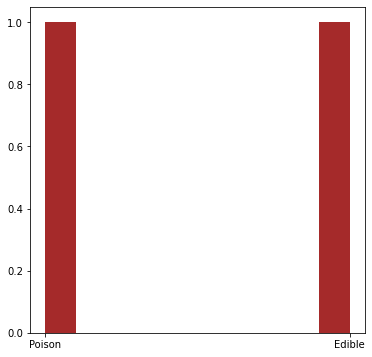

In [15]:
# Bar plot for target (Poisen or Edible) 
# Let's see how many target is. It shows that the categories are reasonably balanced.
target['class'].unique()
target_labels = ['Poison', 'Edible']
plt.figure(figsize=(6,6)) 
plt.hist(target_labels, color = "brown", lw=0, rwidth=1)

To do the EDA, we will examine the correlation plot. There are no high correlations, so no features are needed to remove.

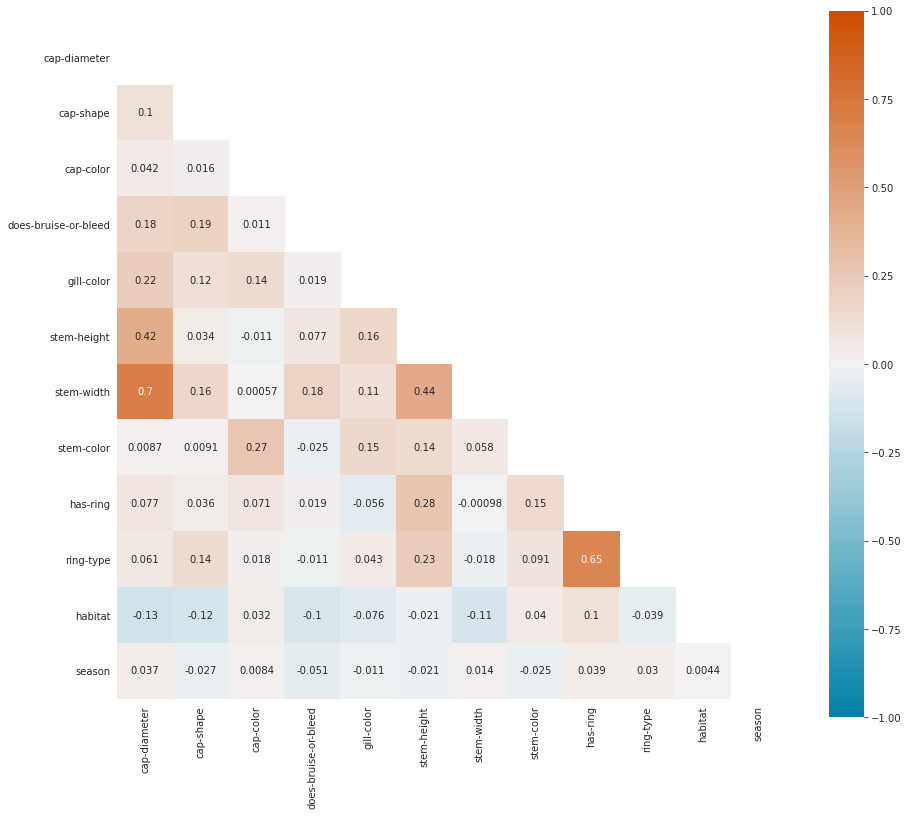

In [16]:
corrMatrix = df.corr()

corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15,13))
    ax = sns.heatmap(corrMatrix, mask=mask, vmax=1, vmin=-1,annot=True, center=0, 
                     square=True, cmap=sns.diverging_palette(230, 22, s=100, as_cmap=True), annot_kws={"fontsize":10})

In [17]:
df.corr()

,cap-diameter,cap-shape,cap-color,does-bruise-or-bleed,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
cap-diameter,1.000000,0.103923,0.042108,0.179440,0.221675,0.422560,0.695330,0.008670,0.077024,0.060747,-0.125820,0.037305
cap-shape,0.103923,1.000000,0.016312,0.191804,0.115703,0.034473,0.157440,0.009061,0.036017,0.136084,-0.124754,-0.027178
cap-color,0.042108,0.016312,1.000000,0.010657,0.136560,-0.010732,0.000573,0.265525,0.070843,0.018092,0.031706,0.008443
does-bruise-or-bleed,0.179440,0.191804,0.010657,1.000000,0.018613,0.076596,0.183514,-0.024913,0.019195,-0.011199,-0.102747,-0.051146
gill-color,0.221675,0.115703,0.136560,0.018613,1.000000,0.157327,0.113915,0.149863,-0.055640,0.043267,-0.075768,-0.011360
stem-height,0.422560,0.034473,-0.010732,0.076596,0.157327,1.000000,0.436117,0.138458,0.281049,0.234375,-0.020664,-0.020630
stem-width,0.695330,0.157440,0.000573,0.183514,0.113915,0.436117,1.000000,0.058146,-0.000981,-0.017722,-0.109960,0.014161
stem-color,0.008670,0.009061,0.265525,-0.024913,0.149863,0.138458,0.058146,1.000000,0.147946,0.091160,0.039917,-0.025461
has-ring,0.077024,0.036017,0.070843,0.019195,-0.055640,0.281049,-0.000981,0.147946,1.000000,0.653726,0.103071,0.038764
ring-type,0.060747,0.136084,0.018092,-0.011199,0.043267,0.234375,-0.017722,0.091160,0.653726,1.000000,-0.039439,0.030069


## <font color='#A52A2A'>4. Model building</font>

As far as I can tell in the defining project idea in the project 2 guide, it is ok to use data with labels in the unsupervised tasks. so I will use a mix of PCA/clustering and Random Forest classification to see how accurate the training data is. The aim is to see whether the given features accurately predict the target variable (poison or edible).

Since my dataset has 60000 samples, the large size may be a key for how to split test/train data. 

### <font color='#A52A2A'>RF - Random Forest</font>

We will use the Random Forest model to explore the train/test accuracy ratio and to find out whether the dataset is well balanced.

In the trials below, I explored split 90/10% (train/test), 80/20%, 70/30%, and 60/40%. In all four cases, the accuracy was more than 99%.

<ipython-input-18-b3b75969309e>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clr_rf = clf_rf.fit(x_train,y_train)


Accuracy is:  0.9968888161126576


<AxesSubplot:>

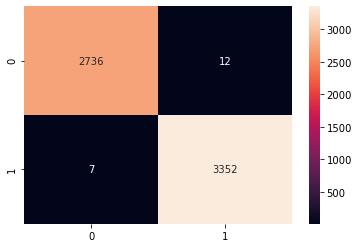

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 90 % and test 10 %
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.1, random_state=40)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=40)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

<ipython-input-19-2f01ab08c8df>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clr_rf = clf_rf.fit(x_train,y_train)


Accuracy is:  0.9957425904699525


<AxesSubplot:>

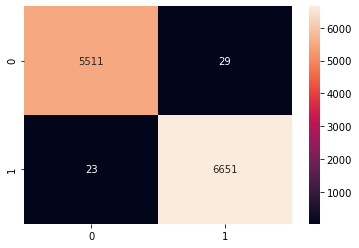

In [19]:
# split data train 80 % and test 20 %
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=40)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=40)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

<ipython-input-20-4595a5a0d24b>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clr_rf = clf_rf.fit(x_train,y_train)


Accuracy is:  0.9956880082964904


<AxesSubplot:>

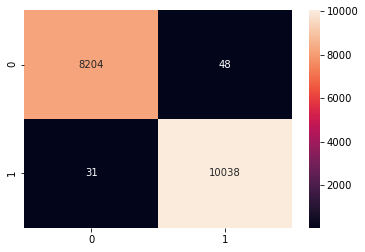

In [20]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.3, random_state=40)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=40)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

<ipython-input-21-181a91b1fb30>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clr_rf = clf_rf.fit(x_train,y_train)


Accuracy is:  0.9958654003602423


<AxesSubplot:>

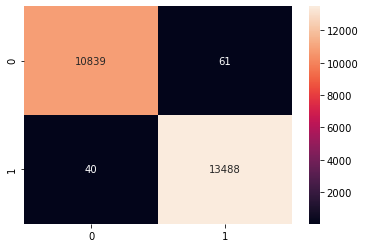

In [21]:
# split data train 60 % and test 40 %
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.4, random_state=40)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=40)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

## <font color='#A52A2A'>5. Model training</font>

As far as I checked by the random forest method, all attempts were high accuracy, and well balanced. But I will use 90%/10% since the accuracy rate was the highest.  To tune the PCA model, first I did a linear transform that transforms the data into a new coordinate system. Then I standardized to eliminate the bias of the initial variables. Last, I checked the best number of components. On the graph below we can see that the area around 2 components was flat, which is indicated the best number of components. 

### <font color='#A52A2A'>5.1 PCA - Principle Component Analysis</font>

In [30]:
# Let's treat p = 0, e = 1
target_p = target.replace('p', 0)
target_p = target_p0.replace('e', 1)

Use the train spit 90% and 10%

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
# split data train 90 % and test 10 %
x_train, x_test, y_train, y_test = train_test_split(df, target_p, test_size=0.1, random_state=40)
# Decision trees with depth = 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(x_train, y_train)
preds = clf.predict_proba(x_test)
print('PCA Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

PCA Accuracy: 0.61094


In [26]:
#Fit the model using sklearn PCA and assign tomodel
from sklearn.decomposition import PCA
model = PCA()
model.fit(df)
transformed = model.transform(df)
print('Principle components: ',model.components_)

Principle components:  [[ 3.81353141e-01  3.14982882e-02  3.53726957e-03  6.66283403e-03
   4.64432595e-02  1.52381883e-01  9.09713842e-01  1.91062726e-02
   1.07207711e-03  1.74309502e-03 -1.38528732e-02  1.76211730e-03]
 [ 4.83875719e-01  1.93963345e-02  4.21456153e-01  4.99145775e-04
   5.02130340e-01  2.73113401e-01 -2.85443077e-01  4.08132656e-01
   2.32401463e-02  1.11851621e-01 -5.98445125e-03  7.31063386e-05]
 [ 6.38017193e-01 -2.20515210e-02 -4.17223536e-01  4.75325695e-03
   1.71051275e-02  6.86499128e-02 -2.65711092e-01 -5.84160219e-01
  -8.09215824e-04  2.34615394e-02 -2.85322556e-02  1.15580695e-02]
 [-2.22308844e-01 -3.16619960e-02 -5.01101651e-01 -5.47890807e-03
  -3.91742061e-02  7.73909793e-01 -3.62957125e-02  2.29440295e-01
   4.26774049e-02  2.03889900e-01  1.90495640e-02 -1.60268644e-02]
 [ 3.02264600e-01 -1.53517898e-01  3.11351103e-01  1.49602951e-04
  -8.45809031e-01  1.66077320e-01 -1.10204972e-01  1.59498033e-01
   3.50316678e-02  6.89089875e-02  3.83383496e-02

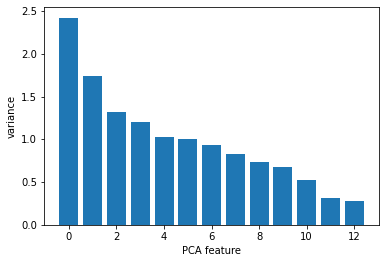

In [28]:
#Standardizaton is to do for both supervised and unsupervised learning
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# PCA variance
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(df_with_target)

plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

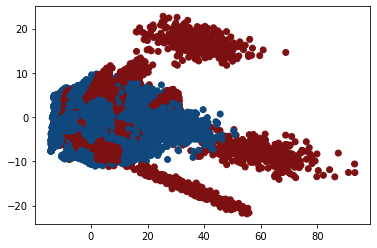

In [38]:
# apply PCA
pca = PCA(n_components =2)
pca.fit(df)
transformed = pca.transform(df)
x = transformed[:,0]
y = transformed[:,1]
color = ['#10487d' if i=='p' else '#7d1010' for i in df_original.loc[:,'class']]
plt.scatter(x,y,c = color)
plt.show()

The PCA model accuracy did not increase significantly after tuning

### <font color='#A52A2A'>5.2 K-Means Clustering</font>

To tune the Kmeans clustering model, after I make clustering label, I labeled high accuracy probability prediction. Last, I checked the best number of clusters. On the graph below we can see that the area around 2 clusters was flat, which indicated the best number of clusters. 

In [36]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(df)

kmeans.cluster_centers_

array([[ 4.74278136,  3.89181832,  6.24630509,  0.11855218,  7.25150159,
         5.73145772,  7.53323848,  8.30645851,  0.23292016,  1.73068184,
         0.68825501,  1.04634108],
       [12.06059822,  4.44246509,  5.87229177,  0.32017333,  7.57125662,
         8.85576974, 24.49911351,  8.75710159,  0.29038276,  1.74006981,
         0.45107126,  1.07191863]])

In [37]:
klabels = kmeans.labels_

print(klabels)
print(len(klabels))

[1 1 1 ... 0 0 0]
61069


The kmeans labels are not sure which label is 0. So there is only two possiblity. so instead of creating permutation looping code, I can step by step manually below.

In [39]:
# p = 0, e = 1 possibility
target_p0 = target.replace('p', 0)
target_p0 = target_p0.replace('e', 1)

In [40]:
# check how many of the samples were correctly labeled
correct_labels = sum(target_p0['class'] == klabels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, target_p0.size))

print('Accuracy score when  p = 0, e = 1: {0:0.2f}'. format(correct_labels/float(target_p0.size)))

Result: 36583 out of 61069 samples were correctly labeled.
Accuracy score when  p = 0, e = 1: 0.60


In [41]:
# first p = 1, e = 0
target_p1 = target.replace('p', 1)
target_p1 = target_p1.replace('e', 0)

In [42]:
# check how many of the samples were correctly labeled
correct_labels = sum(target_p1['class'] == klabels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, target_p1.size))

print('Accuracy score when  p = 1, e = 0: {0:0.2f}'. format(correct_labels/float(target_p1.size)))

Result: 24486 out of 61069 samples were correctly labeled.
Accuracy score when  p = 1, e = 0: 0.40


when p = 0, e = 1, the result was high accuracy

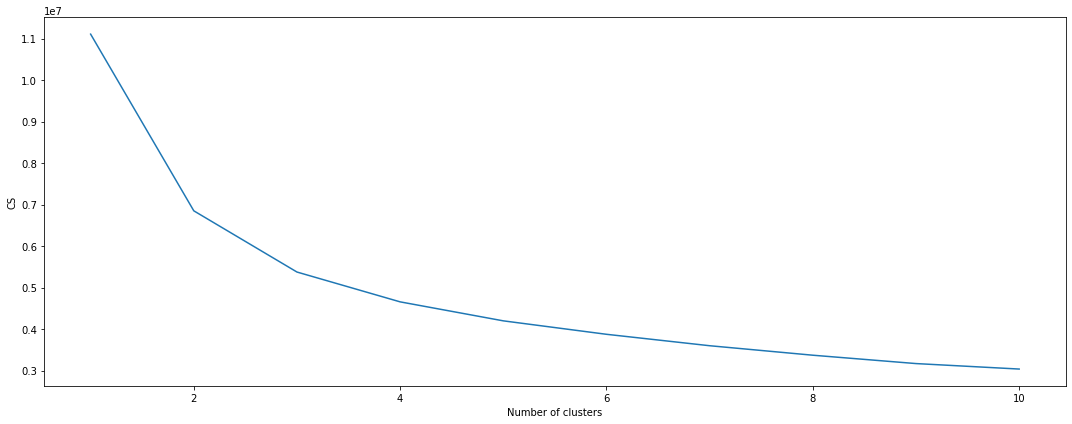

In [47]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

Let's explore the number of clusters, I adjust the number of cluster after the graph above when n = 4, n = 6

In [43]:
kmeans = KMeans(n_clusters=4, random_state=0) 

kmeans.fit(df)

kmeans.cluster_centers_
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(target_p0['class'] == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, target_p0.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(target_p0.size)))

Result: 20385 out of 61069 samples were correctly labeled.
Accuracy score: 0.33


In [44]:
kmeans = KMeans(n_clusters=6, random_state=0) 

kmeans.fit(df)

kmeans.cluster_centers_
labels = kmeans.labels_

# check how many of the samples were correctly labeled
correct_labels = sum(target_p0['class'] == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, target_p0.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(target_p0.size)))

Result: 14144 out of 61069 samples were correctly labeled.
Accuracy score: 0.23


### <font color='#A52A2A'>Hierachy Method</font>

I tried to work Hierachy model, but the computation took too long to complete. Since Random Forest model result was good, I will pick random samples based on Random Forest.

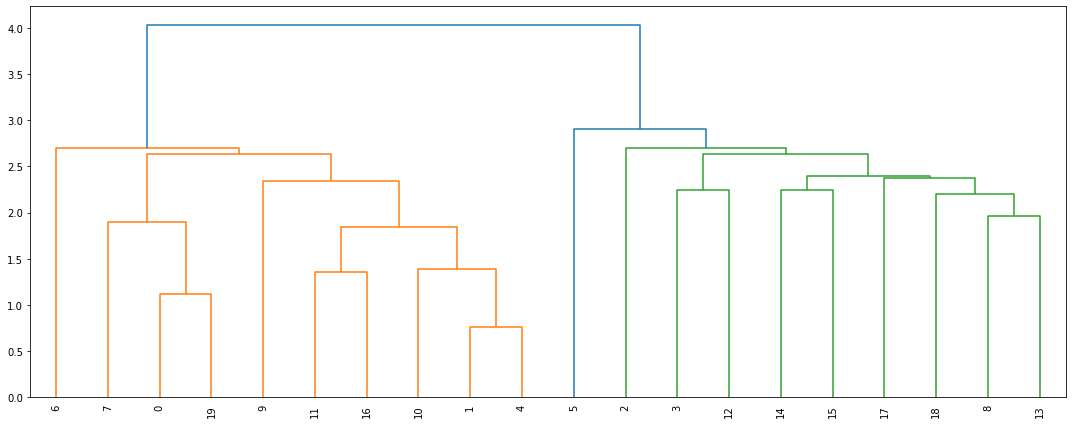

In [45]:
from scipy.cluster.hierarchy import linkage,dendrogram
plt.rcParams["figure.figsize"] = [15, 6]
plt.rcParams["figure.autolayout"] = True
graph = linkage(df.iloc[1200:1220,:],method = 'single')
dendrogram(graph, leaf_rotation = 90, leaf_font_size = 10)
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df)

## <font color='#A52A2A'>6. Results and Analysis:</font>

## Result

- The Random Forest method accuracy: 0.996
- The PCA method accuracy: 0.610
- The Kmean Cluster method accuracy: 0.60


## Analysis
- After accuracy rate comparison, The Random Forest Classifier looks like the best model. 
- Both PCA and Kmeans the accuracy rate were about 60%. 60% may be enough accuracy for unsupervised machine learning problem.
- I thought the dataset was nice and clean. I took a long time to look for a good dataset and EDA was enough. But Accuracy rate was not as high as I expected. 
- let's drop simply focus on two variable cap color and cap-diameter with Kmeans. As you can see the graph below, when I choose the two or three features, the cluster will have split nicely.

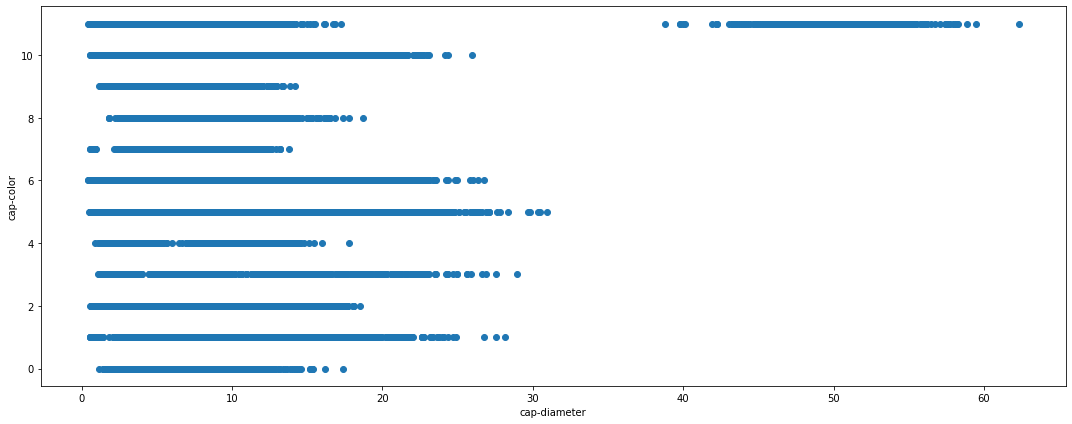

In [48]:
# As you can see there is no labels in data
data_unsupervise = ['cap-diameter', 'cap-color']
plt.scatter(df['cap-diameter'],df['cap-color'])
plt.xlabel('cap-diameter')
plt.ylabel('cap-color')
plt.show()

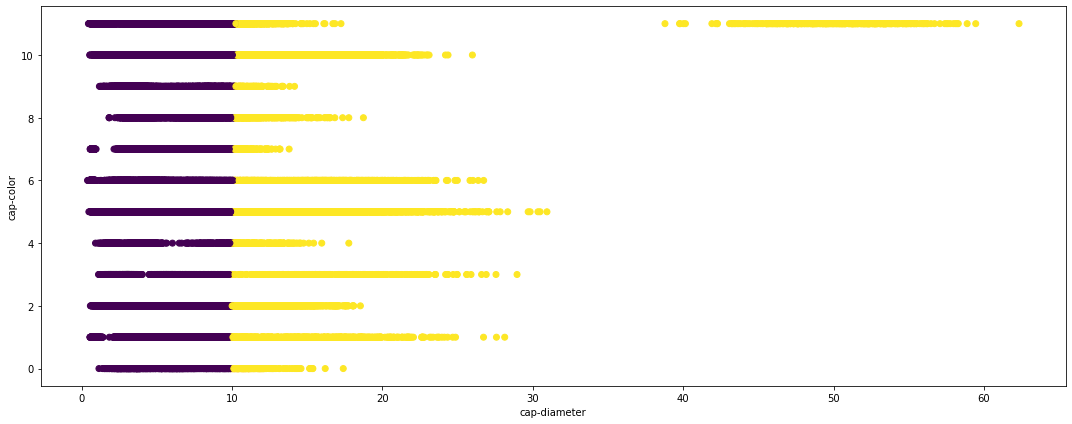

In [49]:
# KMeans Clustering
df2 = df.loc[:,['cap-diameter', 'cap-color']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df2)
labels = kmeans.predict(df2)
plt.scatter(df['cap-diameter'],df['cap-color'],c = labels)
plt.xlabel('cap-diameter')
plt.ylabel('cap-color')
plt.show()

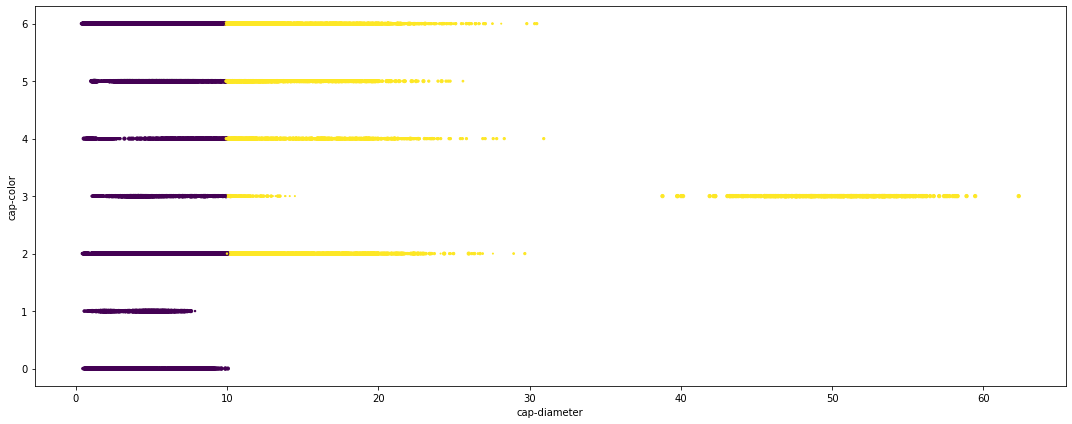

In [50]:
# KMeans Clustering
df2 = df.loc[:,['cap-diameter', 'cap-shape', 'cap-color']]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(df2)
labels = kmeans.predict(df2)
plt.scatter(df['cap-diameter'],df['cap-shape'],df['cap-color'],c = labels)
plt.xlabel('cap-diameter')
plt.ylabel('cap-color')
plt.show()

## <font color='#A52A2A'>7. Discussion and Conclusion:</font> 

## Conclusion
- The Random Forest classifier was a nice model which we can examine results highly for this dataset.  
- When I picked a few features, it was well balanced to split. However, when I consider all features(11), the accuracy score is 0.6, I was not able to find easily the expected result even if I standardized data, and adjust the number of clusters. In the future, if I explore dropping off more features, it may get a higher accuracy rate.

## Discussion
- After I talked with a mushroom expert, I learned that it is almost impossible to predict whether a mushroom is a poison or not, based on only physical characteristics, like shape and color.  Instead, they can predict by chemical characteristics. This dataset does not contain chemical characteristics. However, in spite of having the chemical characteristics in the dataset, we achieved a reasonable accuracy of 60%. 
- Depending on the project scope, I wonder when is a good stopping point and how can we know whether the dataset is not enough information to lead to a conclusion.


## Reference

- https://en.wikipedia.org/wiki/Mushroom
- https://ift.onlinelibrary.wiley.com/doi/abs/10.1111/1541-4337.12708